In [1]:
import os
import numpy as np
import keras
from keras import utils, callbacks
from keras.models import Sequential
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split, StratifiedKFold
#from keras.preprocessing.image import load_img, img_to_array
from skimage.transform import resize
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

np.random.seed(1000)
# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
train_directory = "../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"
test_directory = "../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test"

In [3]:
gen = ImageDataGenerator(rescale=1./255, validation_split=0.1) 
train = gen.flow_from_directory("../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train", 
                                                            target_size=(224, 224), subset="training")
val = gen.flow_from_directory("../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train", 
                                                            target_size=(224, 224), subset="validation")

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [4]:
model = keras.Sequential([
    layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

    layers.Flatten(),
              
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
              
   layers.Dense(units=29, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [5]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
h = model.fit(train, validation_data = val, steps_per_epoch=100, validation_steps=10, epochs=20, batch_size=256)

Epoch 1/20
100/100 [==============================] - 372s 3s/step - loss: 4.2062 - accuracy: 0.0338 - val_loss: 3.3109 - val_accuracy: 0.0375
Epoch 2/20
100/100 [==============================] - 349s 3s/step - loss: 3.9142 - accuracy: 0.0633 - val_loss: 4.5559 - val_accuracy: 0.1000
Epoch 3/20
100/100 [==============================] - 349s 3s/step - loss: 3.5159 - accuracy: 0.1336 - val_loss: 4.1102 - val_accuracy: 0.1281
Epoch 4/20
100/100 [==============================] - 349s 3s/step - loss: 2.8996 - accuracy: 0.2285 - val_loss: 2.5315 - val_accuracy: 0.2156
Epoch 5/20
100/100 [==============================] - 349s 3s/step - loss: 2.2759 - accuracy: 0.3345 - val_loss: 2.7197 - val_accuracy: 0.2750
Epoch 6/20
100/100 [==============================] - 349s 3s/step - loss: 1.7485 - accuracy: 0.4854 - val_loss: 3.2078 - val_accuracy: 0.1688
Epoch 7/20
100/100 [==============================] - 349s 3s/step - loss: 1.1394 - accuracy: 0.6423 - val_loss: 2.3979 - val_accuracy: 0.2969

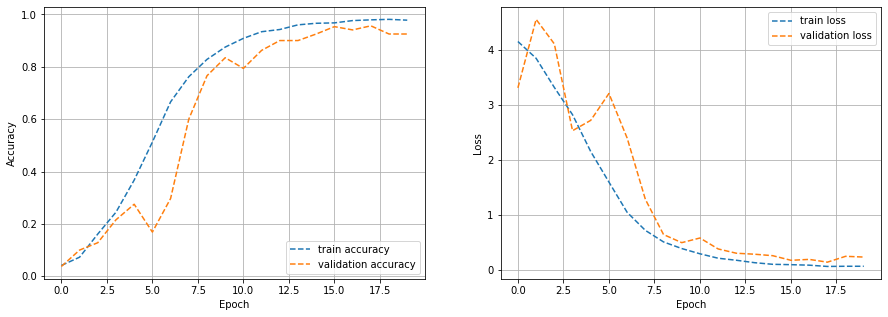

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--', label='train accuracy')
plt.plot(h.history['val_accuracy'], '--', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--', label='train loss')
plt.plot(h.history['val_loss'], '--', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [38]:
test = ImageDataGenerator(rescale=1./255).flow_from_directory("../input/asl-alphabet/asl_alphabet_test", 
                                                            target_size=(224, 224), class_mode=None)
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']

Found 28 images belonging to 1 classes.


In [43]:
pred = model.predict(test)
pred = np.argmax(pred, axis=1)
pred
for p in pred:
    print (classes[p])

del
Y
S
B
X
L
P
F
H
space
U
M
Q
N
Z
I
R
G
V
T
C
E
K
A
D
O
W
J
